In [1]:
"""
Created on Fri Oct 29 11:04:53 2021

@author: yufeng

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

path_project = "/content/drive/MyDrive/Colab Notebooks/GitHubX/SocialMediaVGI4disasters/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def make_autopct(values):
    """" Set visualization format for numbers """
    
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

def plot_df_pie_char(select_df):
    """ Plot pie chart w.r.t. number of document in each topic """
    
    xdf = select_df.groupby(['Topic']).count()
    ax = xdf.plot(kind='pie', y='Title', autopct=make_autopct(xdf['Title']), 
             legend=False, figsize=(8,8))
    ax.set_ylabel('')
    print(len(select_df), set(select_df["Topic"]))

1604 {'ManualAnalysis', 'Spatiotemporal', 'Media', 'Spatial', 'Extraction + Mapping', 'KeywordAmbiguity', 'Temporal', 'Topics', 'EventDetection', 'Management', 'Extraction', 'Eyewitness', 'Sentiment', 'LocationInference', 'WaterLevel', 'Health', 'Others', 'Damage', 'Broadcasting', 'SystemDesign', 'Humanitarian', 'ShortPaper', 'Credibility', 'Review', 'NetworkAnalysis', 'Stage'}
Broadcasting ['n']
Credibility ['x']
Damage ['x']
EventDetection ['x']
Extraction ['x']
Extraction + Mapping ['x']
Eyewitness ['x']
Health ['n']
Humanitarian ['x']
KeywordAmbiguity ['n']
LocationInference ['x']
Management ['n']
ManualAnalysis ['x']
Media ['n']
NetworkAnalysis ['x']
Others ['n']
Review ['n']
Sentiment ['x']
ShortPaper ['n']
Spatial ['x']
Spatiotemporal ['x']
Stage ['x']
SystemDesign ['x']
Temporal ['x']
Topics ['x']
WaterLevel ['x']


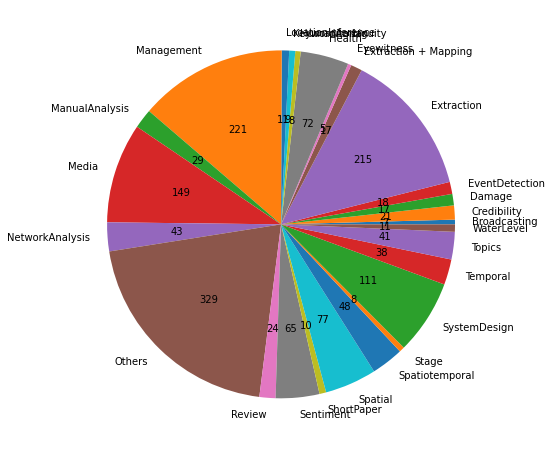

In [3]:
fn = path_project + "literatures.csv"

df = pd.read_csv(fn, names=["Title", "Year", "Dtype", "Relevance", "Topic", "Link", "Source"])

df = df.replace(np.nan, '', regex=True).astype(str)

# Pie chart of all topics
plot_df_pie_char(df)

# Topics for all relevance catogories
for t in list(np.unique(df["Topic"])):
    print(t, np.unique(df[df["Topic"]==t]["Relevance"]))

821 {'Management', 'Broadcasting', 'Review', 'Media', 'KeywordAmbiguity', 'ShortPaper', 'Health', 'Others'}
783 {'Damage', 'Credibility', 'ManualAnalysis', 'WaterLevel', 'Extraction', 'Spatiotemporal', 'Eyewitness', 'Spatial', 'NetworkAnalysis', 'Extraction + Mapping', 'Sentiment', 'Humanitarian', 'Topics', 'SystemDesign', 'Temporal', 'LocationInference', 'Stage', 'EventDetection'}


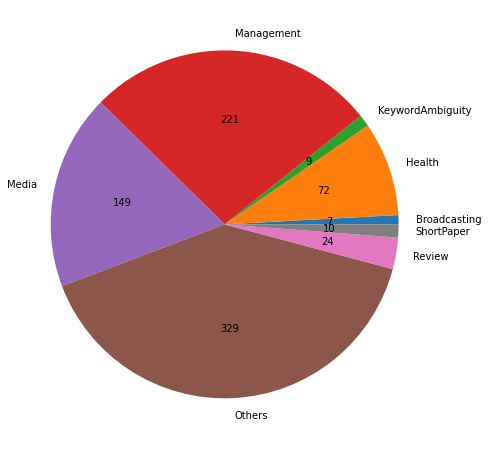

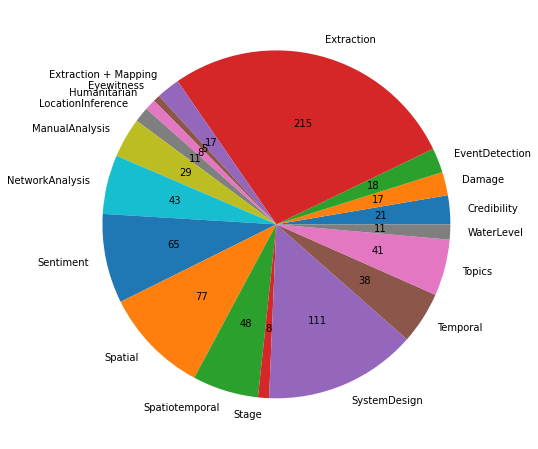

In [4]:
# Pie chart of all topics  
for r in list(np.unique(df["Relevance"])):
    
    select_df = df[df["Relevance"]==r]
    plot_df_pie_char(select_df)

Removed based on full-text 233
550 {'Damage', 'Extraction', 'Spatiotemporal', 'Eyewitness', 'Spatial', 'Extraction + Mapping', 'Sentiment', 'Humanitarian', 'Topics', 'Temporal', 'WaterLevel', 'Stage'}


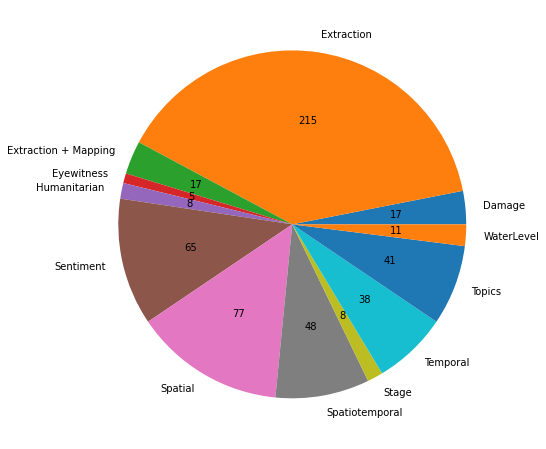

In [5]:
# Excluded documents based on full texts
excluded_topics = ['Credibility', 'LocationInference', 'SystemDesign', 'EventDetection', 'ManualAnalysis', 'NetworkAnalysis']

mask = [t not in excluded_topics for t in select_df['Topic']]
print("Removed based on full-text", len(mask) - sum(mask))

select_df = select_df[mask]
plot_df_pie_char(select_df)

387 {'Damage', 'Extraction', 'Eyewitness', 'Extraction + Mapping', 'Sentiment', 'Humanitarian', 'Topics', 'WaterLevel', 'Stage'}


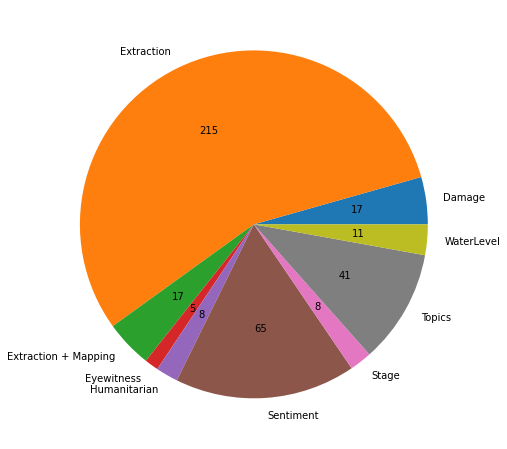

In [6]:
# Included documents for mapping / analysis
included_topics = ['Topics', 'Damage', 'WaterLevel', 'Humanitarian', 'Extraction', 'Stage', 'Sentiment', 'Extraction + Mapping', 'Eyewitness']
in_mask = [t in included_topics for t in select_df['Topic']]
in_mask_selected_df = select_df[in_mask]
plot_df_pie_char(in_mask_selected_df)

163 {'Spatial', 'Temporal', 'Spatiotemporal'}


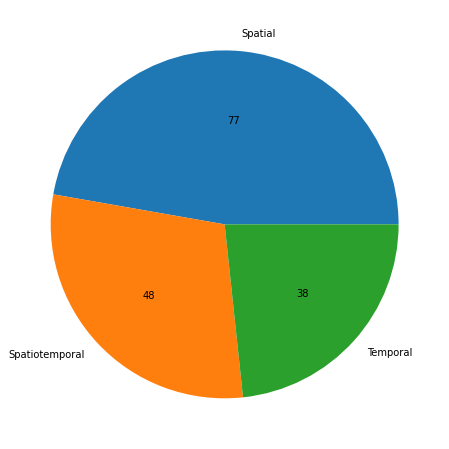

In [7]:
# Included documents for mapping / analysis
included_topics = ['Spatial', 'Temporal', 'Spatiotemporal']
in_mask = [t in included_topics for t in select_df['Topic']]
in_mask_selected_df = select_df[in_mask]
plot_df_pie_char(in_mask_selected_df)